In [1]:
from math import pi
import numpy as np


def f1(x):
    x1 = x[0]
    if x1>pi or x1<-pi:
        x1 = 1000000*abs(x1)
    return x1

def f2(x):
    x1, x2, x3 = x[0], x[1], x[2] 
    if x1>pi or x1<-pi or x2>5 or x2<-5 or x3>5 or x3<-5:
        return 100000*(1-(1/(1*pi*pi))*(abs(x[0])+pi)**2+abs(abs(x[1])-5*np.cos(abs(x[0])))**(1/3)+abs(abs(x[2])-5*np.sin(abs(x[0])))**(1/3))
    else:
        return 1-(1/(1*pi*pi))*(x[0]+pi)**2+abs(x[1]-5*np.cos(x[0]))**(1/3)+abs(x[2]-5*np.sin(x[0]))**(1/3)


In [2]:
x1 = np.arange(-pi, pi, 0.1)
x2 = np.arange(-5, 5, 0.1)
x3 = np.arange(-5, 5, 0.1)

In [3]:
dx = np.arange(-10, 10, 1)
w1 = 2
w2 = 1

In [4]:
def misfit(x):
    mis1 = f1(x)
    mis2 = f2(x)
    return(w1*mis1+w2*mis2)

In [5]:
from scipy.optimize import minimize
dx = np.arange(-10,10,1)

best = minimize(misfit, x0=[0.1,0.1,0.1])
best.x

array([-1.73664234,  0.33728092, -0.27051394])

In [7]:
import random
m1_v=np.zeros(100)
m2_v=np.zeros(100)
#par=[]
for i in range(100):
    w1 = random.uniform(0, 1)
    w2 = 1-w1
    x = [random.uniform(-pi, pi), random.uniform(-5, 5),random.uniform(-5, 5)]
    best = minimize(misfit, x0 = x)
    m1_v[i] = f1(best.x)
    m2_v[i] = f2(best.x)
    #par.append(best.x)
    


array([-3.09873863, -3.0728583 ,  1.4184458 ,  1.92330283, -1.31613173,
       -3.0867651 , -3.13835579, -2.12739515,  2.63962595, -2.78389193,
       -0.88196424, -2.62902137, -2.94373585,  1.74192323,  1.67115577,
        1.91465704,  2.42845916, -0.46095365, -0.4488975 ,  1.51466389,
        2.09996713, -2.99161838, -1.12465946,  1.99489102,  3.13616595,
        2.38085587, -1.09292528,  0.07521923,  2.18074939,  2.61521012,
       -0.487719  ,  0.63566927,  1.73133926,  0.44235025, -2.60909097,
        2.79169161, -0.95013074, -0.2558872 ,  3.06291572,  2.72693733,
       -0.73401688,  1.143663  , -2.29169485, -2.17320511,  0.36756749,
        0.09578457,  2.19496473, -1.44880429, -2.03808038, -2.72234954,
       -0.98827007, -1.72765041, -2.8542872 ,  0.52346675,  2.05594508,
        0.81159075,  1.11600957,  1.30101596, -0.21147262, -2.40580362,
       -2.04424756, -2.42716415,  0.40673053, -2.59696899, -2.77946159,
       -2.55162642, -1.23870781,  2.83454294,  0.68107598,  2.74

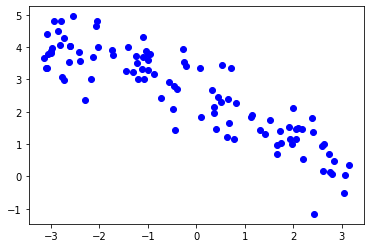

In [8]:
import matplotlib.pyplot as plt
plt.plot(m1_v,m2_v,'bo')
plt.show()